#  Plotting the Correlation vs Time Lag results

**Paolo Marcoccia<sup>1</sup>, Felicia Frederiksson<sup>2</sup>, Alex B. Nielsen<sup>1</sup> and Germano Nardini<sup>1</sup>**

<sub>1. University of Stavanger, Institutt for Matematikk og Fysikk, Kjølv Egelands hus, 5.etg, E-blokk, 4021 Stavanger, Norway </sub> <br>
<sub>2. University of Uppsala, Department of Physics and Astronomy,Ångströmlaboratoriet, Lägerhyddsvägen 1, 751 20 Uppsala, Sweden</sub> 

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.]()

In this notebook, we will learn how to generate the [AllMaxCorrVsTimeShift.png](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/AllMaxCorrVsTimeShift.png) figure, containing the results in terms of correlation vs Time lag for all the considered events at the time of max correlation.
All the following, may be considered as an application of the notebook by [A. Nielsen et al.](https://github.com/KuZa91/gw150914_investigation) for generating the figures [1 & 2](https://github.com/KuZa91/gw150914_investigation/blob/master/Fig1_Fig2_Correlation.ipynb) of the related paper, while additional informations on how to generate multiple subplots may be found in the book of [Jake VanderPlas D.S Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html).
In order to run this pipeline, however, you need the _residuals.hdf_ file generated by running the [CreateResiduals.ipynb](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb) notebook, and in principle, the [CorrVsTime.csv](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/GW150914/CorrVsTime.csv) dataframe obtained by running the [CorrVsTime.ipynb](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/CorrVsTime.ipynb) in order to find the time of max correlation for each event.From the [Code](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code) directory, let's start by loading the modules :

In [1]:
%run init_module.py
ts, ts3 = {},{}

Let's also run the [BigFont.py](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/blob/master/Code/BigFont.py) script in order to increase the font size of the plot.
The setting, may be easily changed from the previous file in order to personalize the final output of this notebook.

In [2]:
%run BigFont.py

We now need to load the correlation vs time lag at the time of max correlation for each of the considered events, let's start by moving in the directory of [GW150914](https://github.com/GravWaves-IMF/Correlation-Method-first-2019-/tree/master/Code/GW150914) :

In [3]:
%cd GW150914/

/home/kuza91/Documents/IPyNB/GWO1/GW150914


and let's load the required information for the analysis :

In [4]:
%run GW150914data.py

# Loading the normal strain and the residual strain

strain = res.get_LSC_Full_strain(hd_nm,psd_start_time-pad_data, psd_end_time + pad_data) 
resstrain = res.get_Full_residual_strain()

# Let's cut them around the LIGO coalescence time and whiten them

for ifo in ifos :
            ts[ifo] = strain[ifo].time_slice((tc - 75.), (tc + 75.))
            ts3[ifo] = resstrain[ifo].time_slice((tc - 75.), (tc + 75.))
   
ts = res.whiten(ts, f_low, f_high)
ts3 = res.whiten(ts3, f_low, f_high)

# We may now estimate the correlation of the original strain and of the residual strain

tau1, corr1 = res.cross_correlation(ts['H1'], ts['L1'], cort)
tau1, corr_null1 = res.cross_correlation(ts3['H1'], ts3['L1'], cort)
_, _, s1, e1 = res.indices_within_window(corr1,timedl,tdlerr) 

('segment length:', 16)


We may now do the same for all the remaining events :

In [5]:
# Loading the GW151012 event data

%cd ..
%cd GW151012/
%run GW151012data.py

# Loading the normal strain and the residual strain

strain = res.get_GWSC_Full_strain(hd_nm,psd_start_time-pad_data, psd_end_time + pad_data) 
resstrain = res.get_Full_residual_strain()

# Let's cut them around the LIGO coalescence time and whiten them

for ifo in ifos :
            ts[ifo] = strain[ifo].time_slice((tc - 75.), (tc + 75.))
            ts3[ifo] = resstrain[ifo].time_slice((tc - 75.), (tc + 75.))
   
ts = res.whiten(ts, f_low, f_high)
ts3 = res.whiten(ts3, f_low, f_high)

# We may now estimate the correlation of the original strain and of the residual strain

tau2, corr2 = res.cross_correlation(ts['H1'], ts['L1'], cort) 
tau2, corr_null2 = res.cross_correlation(ts3['H1'], ts3['L1'], cort)
_, _, s2, e2 = res.indices_within_window(corr2,timedl,tdlerr) 

/home/kuza91/Documents/IPyNB/GWO1
/home/kuza91/Documents/IPyNB/GWO1/GW151012
segment length: 16


In [6]:
# Loading the GW151226 event data

%cd .. 
%cd GW151226/
%run GW151226data.py

# Loading the normal strain and the residual strain

strain = res.get_GWSC_Full_strain(hd_nm,psd_start_time-pad_data, psd_end_time + pad_data) 
resstrain = res.get_Full_residual_strain()

# Let's cut them around the LIGO coalescence time and whiten them

for ifo in ifos :
            ts[ifo] = strain[ifo].time_slice((tc - 75.), (tc + 75.))
            ts3[ifo] = resstrain[ifo].time_slice((tc - 75.), (tc + 75.))
   
ts = res.whiten(ts, f_low, f_high)
ts3 = res.whiten(ts3, f_low, f_high)

# We may now estimate the correlation of the original strain and of the residual strain

tau3, corr3 = res.cross_correlation(ts['H1'], ts['L1'], cort) 
tau3, corr_null3 = res.cross_correlation(ts3['H1'], ts3['L1'], cort)
_, _, s3, e3 = res.indices_within_window(corr3,timedl,tdlerr) 

/home/kuza91/Documents/IPyNB/GWO1
/home/kuza91/Documents/IPyNB/GWO1/GW151226
segment length: 16


In [7]:
# Loading the GW170104 event data

%cd ..
%cd GW170104/
%run GW170104data.py

# Loading the normal strain and the residual strain

strain = res.get_GWSC_Full_strain(hd_nm,psd_start_time-pad_data, psd_end_time + pad_data) 
resstrain = res.get_Full_residual_strain()

# Let's cut them around the LIGO coalescence time and whiten them

for ifo in ifos :
            ts[ifo] = strain[ifo].time_slice((tc - 75.), (tc + 75.))
            ts3[ifo] = resstrain[ifo].time_slice((tc - 75.), (tc + 75.))
   
ts = res.whiten(ts, f_low, f_high)
ts3 = res.whiten(ts3, f_low, f_high)

# We may now estimate the correlation of the original strain and of the residual strain

tau4, corr4 = res.cross_correlation(ts['H1'], ts['L1'], cort) 
tau4, corr_null4 = res.cross_correlation(ts3['H1'], ts3['L1'], cort)
_, _, s4, e4 = res.indices_within_window(corr4,timedl,tdlerr) 

/home/kuza91/Documents/IPyNB/GWO1
/home/kuza91/Documents/IPyNB/GWO1/GW170104
segment length: 16.0


We may finally start plotting the results, let's create a multiple subplot : 

Text(0.5,0.06,'Relative Time Lag $H - L$ $[ms]$')

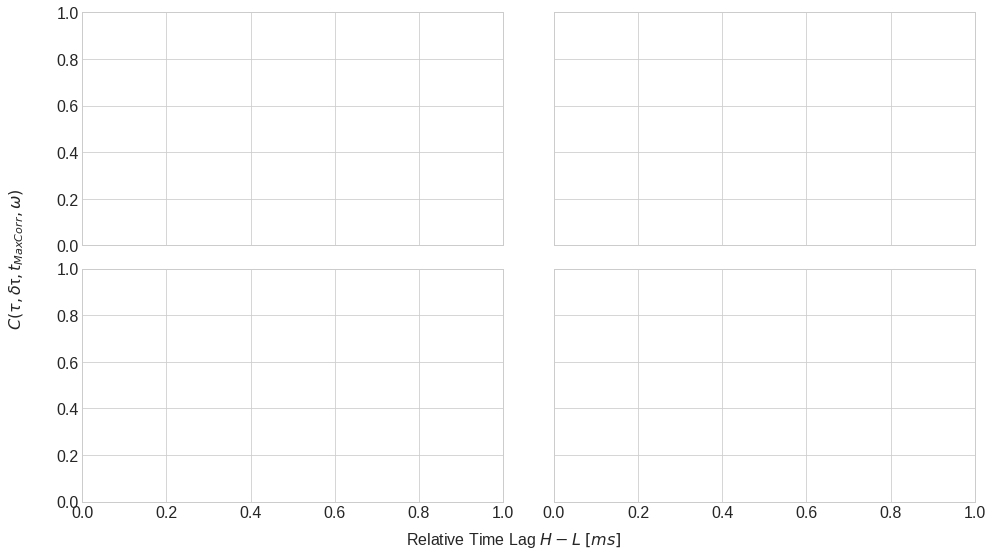

In [8]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize =[16,9])
plt.subplots_adjust(wspace = 0.12, hspace = 0.1)
fig.text(0.06, 0.5, r'$C(\tau, \delta $'+u'τ'+'$, t_{MaxCorr}, \omega)$', va = 'center', rotation='vertical')
fig.text(0.5, 0.06, 'Relative Time Lag ' + r'$H - L$'+' '+'$[ms]$', ha = 'center')

The main structure of the plot is done, let's fullfill the single subplots :

In [9]:
# Plotting the GW150914 Correlation vs Time Lag

ax[0,0].set_title('GW150914') 
ax[0,0].set_xlim(-10,10)
ax[0,0].set_ylim(-1.2,1.2)
ax[0,0].axhline(1.0,0,1, color ='black')
ax[0,0].axhline(-1.0,0,1, color = 'black')
ax[0,0].plot(tau1*1000, corr1, label='Original Data Including Signal', color = 'navy')
ax[0,0].plot(tau1*1000, corr_null1 , label='Residuals', color = 'violet')
ax[0,0].axvspan(s1*1000, e1*1000, alpha=0.4, color='grey', zorder=-1)
ax[0,0].legend(loc = 2, bbox_to_anchor=(0.,0.2,0.75,0.75))

In [10]:
# Plotting the GW151012 Correlation vs Time Lag

ax[0,1].set_title('GW151012') 
ax[0,1].set_xlim(-10,10)
ax[0,1].set_ylim(-1.2,1.2)
ax[0,1].axhline(1.0,0,1, color ='black')
ax[0,1].axhline(-1.0,0,1, color = 'black')
ax[0,1].plot(tau2*1000, corr2, label='Original Data Including Signal', color = 'navy')
ax[0,1].plot(tau2*1000, corr_null2 , label='Residuals', color = 'violet')
ax[0,1].axvspan(s2*1000, e2*1000, alpha=0.4, color='grey', zorder=-1)

In [11]:
# Plotting the GW151226 Correlation vs Time Lag

ax[1,0].set_title('GW151226') 
ax[1,0].set_xlim(-10,10)
ax[1,0].set_ylim(-1.2,1.2)
ax[1,0].axhline(1.0,0,1, color ='black')
ax[1,0].axhline(-1.0,0,1, color = 'black')
ax[1,0].plot(tau3*1000, corr3, label='Original Data Including Signal', color = 'navy')
ax[1,0].plot(tau3*1000, corr_null3 , label='Residuals', color = 'violet')
ax[1,0].axvspan(s3*1000, e3*1000, alpha=0.4, color='grey', zorder=-1)

In [12]:
# Plotting the GW170104 Correlation vs Time Lag

ax[1,1].set_title('GW170104') 
ax[1,1].set_xlim(-10,10)
ax[1,1].set_ylim(-1.2,1.2)
ax[1,1].axhline(1.0,0,1, color ='black')
ax[1,1].axhline(-1.0,0,1, color = 'black')
ax[1,1].plot(tau4*1000, corr4, label='Original Data Including Signal', color = 'navy')
ax[1,1].plot(tau4*1000, corr_null4 , label='Residuals', color = 'violet')
ax[1,1].axvspan(s4*1000, e4*1000, alpha=0.4, color='grey', zorder=-1)

The figure obtained may be saved by running :

In [13]:
%cd .. 
fig.savefig('AllMaxCorrVsTimeShift.png',dpi = 200)

/home/kuza91/Documents/IPyNB/GWO1
